<a href="https://colab.research.google.com/github/PranayLendave/Python_projects/blob/main/adversarial_patch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!cp /content/sample_data/Untitled.png /content/gdrive/MyDrive/yolov7/runs/test

cp: cannot stat '/content/sample_data/Untitled.png': No such file or directory


In [ ]:
banana ="/content/gdrive/MyDrive/yolov7/runs/test/download.jpg"

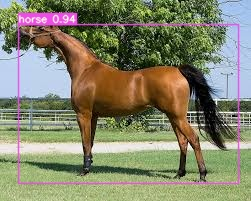

In [ ]:
from IPython.display import Image, display
# display(Image(filename=banana))
# print("\n")
# display(Image(filename="runs/detect/exp31/download.jpg"))
# print("\n")
# display(Image(filename="runs/detect/exp32/Screenshot_20221108_092426.png"))
# print("\n")
# display(Image(filename="/content/gdrive/MyDrive/yolov7/runs/test/Untitled.png"))
print("\n")
display(Image(filename="runs/detect/exp/images.jpeg"))



In [ ]:
runs/detect/exp31/download.jpg

In [ ]:
print(banana)

/content/sample_data/download.jpg


In [ ]:
 %cd /content/gdrive/MyDrive/yolov7

/content/gdrive/.shortcut-targets-by-id/1ym5LLUQxfoR0BfVLRkDprWDoDe7tVfAS/yolov7


In [ ]:
!python detect.py --weights yolov7.pt --conf 0.25 --img-size 640 --source /content/gdrive/MyDrive/yolov7/adversarial_patch/patch_img_100

Namespace(agnostic_nms=False, augment=False, classes=[17], conf_thres=0.25, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', no_trace=False, nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='/content/gdrive/MyDrive/yolov7/adversarial_patch/patch_img_100', update=False, view_img=False, weights=['yolov7.pt'])
YOLOR 🚀 v0.1-104-g941b94c torch 1.12.1+cu113 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
Model Summary: 306 layers, 36905341 parameters, 6652669 gradients
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

/usr/local/lib/python3.7/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
1 horse,

In [ ]:
names= [ 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light',
         'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
         'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee',
         'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard',
         'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
         'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch',
         'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
         'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear',
         'hair drier', 'toothbrush' ]

for i in len(names):
  if names[i]==horse:
    print(i)

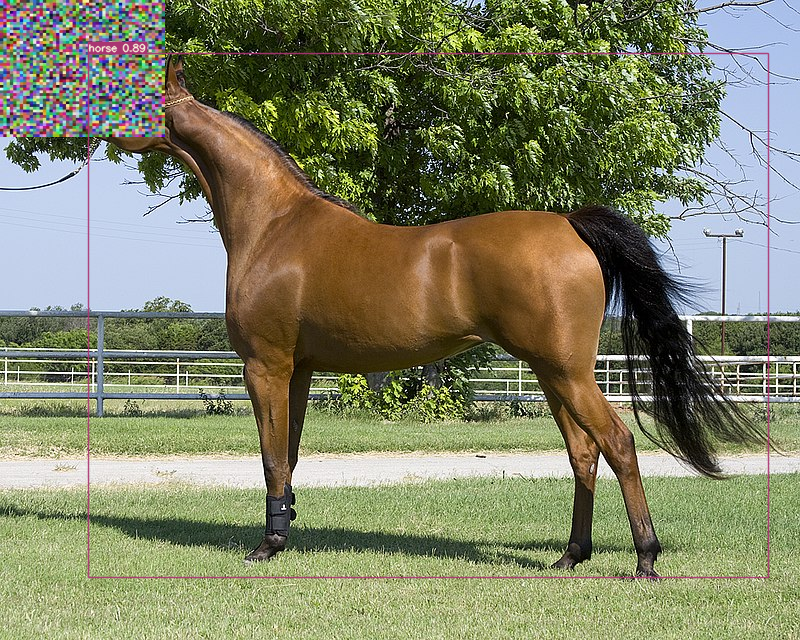

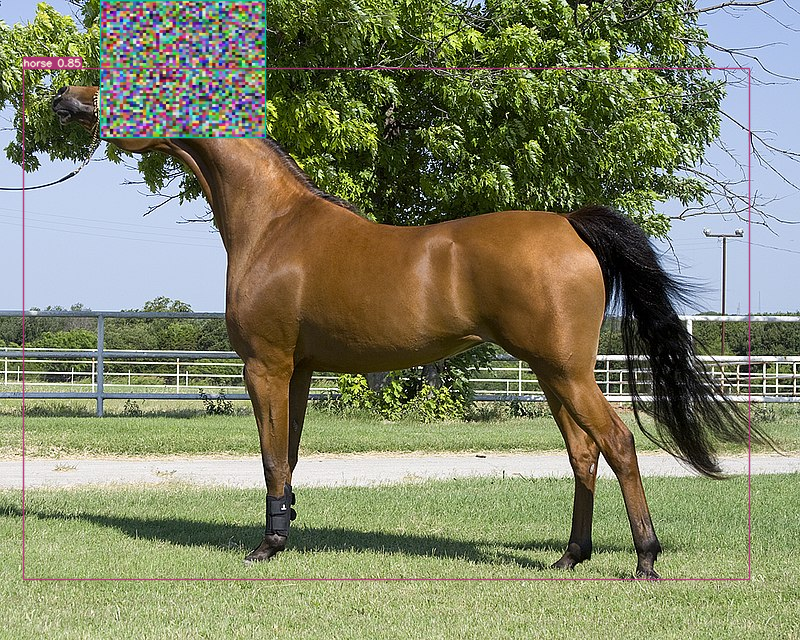

In [ ]:
import glob
from IPython.display import Image, display

i = 0
limit = 10000 # max images to print
for imageName in glob.glob('/content/gdrive/MyDrive/yolov7/runs/detect/exp2/*.png'):
    #Assuming JPG
    if i < limit:
      display(Image(filename=imageName))
      print("\n")
    i = i + 1

In [ ]:
!git clone https://github.com/A-LinCui/Adversarial_Patch_Attack

In [ ]:
!python /kaggle/working/Adversarial_Patch_Attack/Attack.py

In [2]:
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
%cd /content/sample_data

/content/sample_data


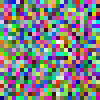

True

In [ ]:
import numpy as np
import cv2
import random


row=[]
image=[]
for i in range(0,100):
  if i%4==0:
    for j in range(0,100):
      if j%4==0:
        a=random.randrange(0,255)
        b=random.randrange(0,255)
        c=random.randrange(0,255)
      pixel=[a,b,c]
      row.append(pixel)

  else :
    row = image[i-1]
  image.append(row)
  row=[]
  


  # print(pixel)


# imgr = [numpy.ones((300,300,1),numpy.uint8)*150]
# imgb = numpy.ones((300,300,1),numpy.uint8)*100
# imgg = numpy.ones((300,300,1),numpy.uint8)*50

colour_image=np.array(image)
# print(colour_image)
cv2_imshow(colour_image)
cv2.imwrite('patch.jpg',colour_image)
# cv2_waitKey(0)
# cv2_destroyAllWindows()

# Patch Iamges Creation

In [ ]:
import cv2
# Load two images
temp1 = cv2.imread('1.jpg')
img2 = cv2.imread('2.png')
img2 = cv2.resize(img2, (330//2, 275//2))
# I want to put logo on top-left corner, So I create a ROI
rows2,cols2, channels = img2.shape   # patch_image
print(rows2, cols2)
rows1,cols1,channels1 = temp1.shape # banana _image
print(rows1,cols1)

for row_itr in range(0, rows1-rows2, 20):
    print(f"{row_itr},row_itr completed")
    for col_itr in range(0, cols1 - cols2, 20):
        img1 = temp1.copy()
        # roi = img1[0:rows, 0:cols]
        # roi = img1[0:rows, cols1 - cols:cols1]
        # roi = img1[rows1 - rows:rows1, 0:cols]
        roi = img1[row_itr:rows2+row_itr, col_itr:cols2+col_itr]
        # cv2.imshow('roi', roi)
        # cv2.waitKey(5000)
        # cv2.destroyAllWindows()
        # Now create a mask of logo and create its inverse mask also
        img2gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
        ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
        mask_inv = cv2.bitwise_not(mask)
        # Now black-out the area of logo in ROI
        img1_bg = cv2.bitwise_and(roi, roi, mask=mask_inv)
        # Take only region of logo from logo image.
        img2_fg = cv2.bitwise_and(img2, img2, mask=mask)
        # Put logo in ROI and modify the main image
        dst = cv2.add(img1_bg, img2_fg)
        # img1[0:rows, 0:cols] = dst
        # img1[0:rows, cols1 - cols:cols1] = dst
        # img1[rows1 - rows:rows1, 0:cols] = dst
        img1[row_itr:rows2+row_itr, col_itr:cols2+col_itr] = dst
        cv2.imwrite(f"patch_img/{row_itr}_{col_itr}.png", img1)
        # cv2.imshow('res', img1)
        # cv2.waitKey(5000)
        # cv2.destroyAllWindows()

In [4]:
%cd /content/gdrive/MyDrive/yolov7

/content/gdrive/.shortcut-targets-by-id/1ym5LLUQxfoR0BfVLRkDprWDoDe7tVfAS/yolov7


In [5]:
#Jupyternotebook

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
imagePath="images.jpeg"
img=cv2.imread(imagePath)
im_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
sizeConstant=0.

In [4]:
print(np.shape(img)[1])


251


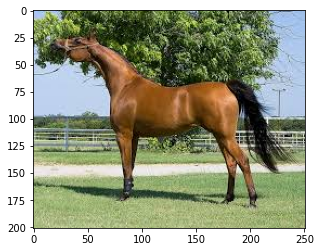

In [5]:

plt.imshow(im_rgb)
plt.show()

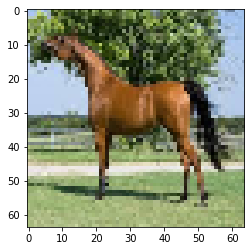

In [6]:
# img_1=cv2.resize(im_rgb,(round(np.shape(img)[1]*sizeConstant),round(np.shape(img)[0]*sizeConstant)))
img_1=cv2.resize(im_rgb,(64,64))
plt.imshow(img_1)



In [9]:
print(np.shape(img_1))

(64, 64, 3)


In [7]:
im_rgb = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)
cv2.imwrite("im_rgb.jpeg",im_rgb)

True